# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data importing
Helper function that will help transforming the string that represents a list in the Excel file, to an actual Python list

In [107]:
def string_to_list(column):
    return [element.strip(" ") for element in column.strip("[]").replace("'", "").replace('"', "").split(", ")]

In [108]:
PATH = 'data/'

recensement = pd.read_excel(PATH + '1832_cleaned_data_recensement.xlsx')
recensement["PROPRIÉTAIRES DES MAISONS."] = recensement["PROPRIÉTAIRES DES MAISONS."].apply(string_to_list)

cadastre = pd.read_excel(PATH + 'legende.xlsx')
cadastre["use"] = cadastre["use"].apply(string_to_list)

In [81]:
recensement.head(5)

,Unnamed: 0,NOMS DES RUES.,N° des MAISONS.,PROPRIÉTAIRES DES MAISONS.,NOMS DES CHEFS DE FAMILLE ET AUTRES LOCATAIRES. NOMS DE BAPTÊME.,NOMS DES CHEFS DE FAMILLE ET AUTRES LOCATAIRES. NOMS DE FAMILLE.,Année de la naissance. [h],NOMS DE LEURS ÉPOUSES.,Année de la naissance. [f],Noms de leurs enfans actuellement dans la Commune.,...,Date de leur demeure dans la Commune.,VOCATION.,N° de leur Récépissé. [famille],"NOMS DES PENSIONNAIRES, COMMIS, APPRENTIS, OUVRIERS ET DOMESTIQUES. NOMS DE BAPTÊME.","NOMS DES PENSIONNAIRES, COMMIS, APPRENTIS, OUVRIERS ET DOMESTIQUES. NOMS DE FAMILLE.","D'où ils sont bourgeois, ou à ce défaut d'où ils sont originaires. [dom/pens]","Indiquer ici s'ils sont Pensionnaires, Commis, Apprentis, Ouvriers ou Domestiques.",N° de leur Récépissé. [dom/pens],OBSERVATIONS.,Page
0,0,[],['7'],[Gilliéron],['Jean Louis'],"[['Deprez', 'Devez']]",['1768'],"[['Echs', 'Ochs']]",['1793'],"[['Laura', 'Lucia', 'Lucy']]",...,['1831'],"['journalier', 'journalier']",[],[],[],[],[],[],[],3
1,1,[],['7'],[],"[['Jean Andre', 'Jean Marc', 'Jean Marie', 'Je...",['Fontannaz'],['1778'],"['Sophprant', 'Loretti']",['1778'],"['Jeanne', 'Jeanne', 'Abram', 'Jeannette', ['D...",...,['1812'],"['journalier', 'journalier']",['1525'],[],[],[],[],[],[],3
2,2,[],['7'],[],['Marie Louis'],"[['Guerry', 'Minery', 'Querry', 'Terry', 'Thie...",['1774'],['Chavan'],['1777'],"[['Louis', 'Louisa', 'Louise', 'Louison'], 'In...",...,['né'],['vigneron'],[],[],[],[],[],[],[],3
3,3,['fno'],['7'],[Cherbuin],['Henry'],['Cherbuin'],['1798'],['Perret'],['1793'],"['Louise', 'Samuel']",...,['1812'],['charpentier'],['2212'],[],[],[],[],[],[],3
4,4,['fno'],['7'],[],['Jaques'],['Mermoud'],['1780'],[],[],[],...,['1830'],['manoeuvre'],[],[],[],[],[],[],[],3


In [80]:
cadastre.head(5)

,Unnamed: 0,folio,nr,articles,use,owner_surname,Unnamed: 6
0,0,1,1.0,NaN,"[place, passage]",Commune de Lausanne,NaN
1,1,1,2.0,NaN,[terrasse],Commune de Lausanne,NaN
2,2,1,3.0,NaN,[place],Marie-Antoine De la Forêt,NaN
3,3,1,4.0,NaN,[maison],Marie-Antoine De la Forêt,NaN
4,4,1,5.0,NaN,[jardin],Marie-Antoine De la Forêt,NaN


# Visualisations
## Distribution of uses

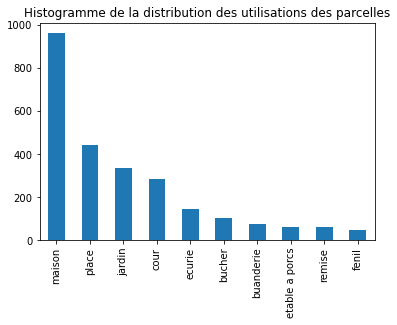

In [77]:
cadastre.explode("use")["use"].value_counts()[:10].plot(kind='bar', title="Histogramme de la distribution des utilisations des parcelles")

## Who possesses the most terrain ?

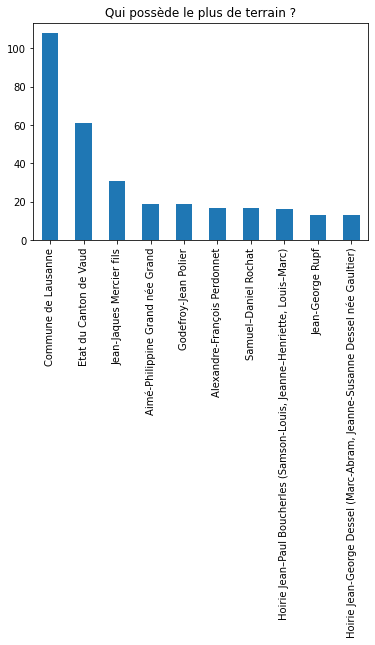

In [121]:
cadastre.owner_surname.value_counts()[:10].plot(kind="bar", title = "Qui possède le plus de terrain ?")

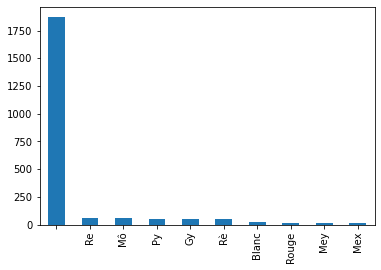

In [86]:
recensement.explode("PROPRIÉTAIRES DES MAISONS.")["PROPRIÉTAIRES DES MAISONS."].value_counts()[:10].plot(kind='bar')

# Merging the two datasets
Before trying to merge, we must "explode" the recensement dataset such that we get one entry for each owner. Meaning that if an entry has owner [A, B], it should create two entries, the first one belonging to A only and the second one to B only. We then only keep an entry if it has an owner

In [116]:
recensement_exploded = recensement.explode("PROPRIÉTAIRES DES MAISONS.")
recensement_exploded = recensement_exploded[recensement_exploded["PROPRIÉTAIRES DES MAISONS."].str.len() > 0]

We will first try to merge the two datasets given the full owner names from both datasets. Sadly, it yields an empty dataset, which mean we cannot match them this way. This is mostly due to the fact that the owner_surnames in the cadastre DataFrame actually also contain first names and other indications.

In [84]:
pd.merge(cadastre, recensement.explode("PROPRIÉTAIRES DES MAISONS."), left_on = "owner_surname", right_on = "PROPRIÉTAIRES DES MAISONS.", how = "inner")

,Unnamed: 0_x,folio,nr,articles,use,owner_surname,Unnamed: 6,Unnamed: 0_y,NOMS DES RUES.,N° des MAISONS.,...,Date de leur demeure dans la Commune.,VOCATION.,N° de leur Récépissé. [famille],"NOMS DES PENSIONNAIRES, COMMIS, APPRENTIS, OUVRIERS ET DOMESTIQUES. NOMS DE BAPTÊME.","NOMS DES PENSIONNAIRES, COMMIS, APPRENTIS, OUVRIERS ET DOMESTIQUES. NOMS DE FAMILLE.","D'où ils sont bourgeois, ou à ce défaut d'où ils sont originaires. [dom/pens]","Indiquer ici s'ils sont Pensionnaires, Commis, Apprentis, Ouvriers ou Domestiques.",N° de leur Récépissé. [dom/pens],OBSERVATIONS.,Page


Because of this flaw, let's try to split the owner names on blank spaces in the cadastre dataset and explode it as well

In [118]:
cadastre["owner_names"] = cadastre["owner_surname"].apply(lambda name : name.split(" "))
cadastre_exploded = cadastre.explode("owner_names")

We can now try to merge again

In [120]:
merged = pd.merge(cadastre_exploded, recensement_exploded, left_on = "owner_names", right_on = "PROPRIÉTAIRES DES MAISONS.", how="inner")
merged

,Unnamed: 0_x,folio,nr,articles,use,owner_surname,Unnamed: 6,owner_names,Unnamed: 0_y,NOMS DES RUES.,...,Date de leur demeure dans la Commune.,VOCATION.,N° de leur Récépissé. [famille],"NOMS DES PENSIONNAIRES, COMMIS, APPRENTIS, OUVRIERS ET DOMESTIQUES. NOMS DE BAPTÊME.","NOMS DES PENSIONNAIRES, COMMIS, APPRENTIS, OUVRIERS ET DOMESTIQUES. NOMS DE FAMILLE.","D'où ils sont bourgeois, ou à ce défaut d'où ils sont originaires. [dom/pens]","Indiquer ici s'ils sont Pensionnaires, Commis, Apprentis, Ouvriers ou Domestiques.",N° de leur Récépissé. [dom/pens],OBSERVATIONS.,Page
0,19,1,20.0,NaN,[jardin],Marie-Susanne Dapples née Gleyre,NaN,Dapples,3083,['Montron'],...,[],['propriétaire'],[],[],[],[],[],[],[],132
1,20,1,21.0,NaN,[hangar],Marie-Susanne Dapples née Gleyre,NaN,Dapples,3083,['Montron'],...,[],['propriétaire'],[],[],[],[],[],[],[],132
2,21,1,22.0,NaN,[place],Marie-Susanne Dapples née Gleyre,NaN,Dapples,3083,['Montron'],...,[],['propriétaire'],[],[],[],[],[],[],[],132
3,22,1,23.2,NaN,"[bucher, serre]",Marie-Susanne Dapples née Gleyre,NaN,Dapples,3083,['Montron'],...,[],['propriétaire'],[],[],[],[],[],[],[],132
4,23,1,24.0,NaN,[maison],Marie-Susanne Dapples née Gleyre,NaN,Dapples,3083,['Montron'],...,[],['propriétaire'],[],[],[],[],[],[],[],132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7557,2592,25,7.0,NaN,[basse-cour],César-Elizée Audra,NaN,Audra,303,['Nosice'],...,['1815'],[],['Jam'],"[['Babette', 'Lisette', 'Susette'], 'Henri', '...","['Chavan', 'Schopfer', 'Pollen', 'Chapuis']","[['Genève', 'Lutry', 'Pully'], 'La Praz', 'Yvo...","['ievx', 'rentier', 'rentier', 'rentier']","['1592', '3527', '2664']",[],14
7558,2593,25,9.0,NaN,[serre],Hoirie Abram-Louis Langin,NaN,Langin,298,['Coises'],...,['né'],['rentiere'],[],['Fanchette'],['Baud'],['Crissier'],['1d33'],['2441'],[],14
7559,2594,25,13.0,NaN,[maison],Hoirie Abram-Louis Langin,NaN,Langin,298,['Coises'],...,['né'],['rentiere'],[],['Fanchette'],['Baud'],['Crissier'],['1d33'],['2441'],[],14
7560,2595,25,14.0,NaN,"[grange, ecurie]",Hoirie Abram-Louis Langin,NaN,Langin,298,['Coises'],...,['né'],['rentiere'],[],['Fanchette'],['Baud'],['Crissier'],['1d33'],['2441'],[],14


We now get 7562 results, which is not bad. Of course the current matching is not a 1-to-1 function as it should be. Rather, a terrain is matched to all entries in the recensement belonging to the same person. A 1-to-1 matching will probably require manual work.

Moreover, we only match on the surname, which means that there are probably some mistake in the current matching